In [1]:
from pathlib import Path
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
from unidecode import unidecode
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import word2vec
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import gensim
from nltk.stem import SnowballStemmer
from nltk.stem import RSLPStemmer
import unicodedata

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
def load_corpus(filename):
    corpus = Path(filename).read_text(encoding="utf8")
    return corpus

In [3]:
def load_corpora(filelist,author):
    files = []
    for file in filelist:
        location = "Corpora/train/"+file
        corpus = load_corpus(location)
        files.append(corpus)
    df = pd.DataFrame(files, columns=['Text'])
    df['Author'] = pd.Series([author for x in range(len(df.index))], index=df.index)
    return df

In [4]:
train_set_almada = [
    'AlmadaNegreiros/pg22615.txt',
    'AlmadaNegreiros/pg22730.txt',
    'AlmadaNegreiros/pg22801.txt',
    'AlmadaNegreiros/pg22802.txt',
    'AlmadaNegreiros/pg22969.txt',
    'AlmadaNegreiros/pg23133.txt',
    'AlmadaNegreiros/pg23620.txt',
    'AlmadaNegreiros/pg23879.txt',
    'AlmadaNegreiros/pg23961.txt'
]

In [5]:
corpora_almada = load_corpora(train_set_almada, 'Almada Negreiros')
corpora_almada.shape

(9, 2)

In [6]:
train_set_camilo = [
    'CamiloCasteloBranco/24691-0.txt',
    'CamiloCasteloBranco/34756-0.txt',
    'CamiloCasteloBranco/pg16425.txt',
    'CamiloCasteloBranco/pg17927.txt',
    'CamiloCasteloBranco/pg19375.txt',
    'CamiloCasteloBranco/pg21406.txt',
    'CamiloCasteloBranco/pg23203.txt',
    'CamiloCasteloBranco/pg23345.txt',
    'CamiloCasteloBranco/pg23346.txt',
    'CamiloCasteloBranco/pg24339.txt',
    'CamiloCasteloBranco/pg25844.txt',
    'CamiloCasteloBranco/pg26017.txt',
    'CamiloCasteloBranco/pg26103.txt',
    'CamiloCasteloBranco/pg26110.txt',
    'CamiloCasteloBranco/pg26988.txt',
    'CamiloCasteloBranco/pg27364.txt',
    'CamiloCasteloBranco/pg27541.txt',
    'CamiloCasteloBranco/pg28310.txt',
    'CamiloCasteloBranco/pg31694.txt',
    'CamiloCasteloBranco/pg33788.txt',
]

corpora_camilo = load_corpora(train_set_camilo, 'Camilo Castelo Branco')
corpora_camilo.shape

(20, 2)

In [7]:
train_set_eca = [
    'EcaDeQueiros/pg18220.txt',
    'EcaDeQueiros/pg25641.txt',
    'EcaDeQueiros/pg27637.txt',
    'EcaDeQueiros/pg31347.txt',
    'EcaDeQueiros/pg40409.txt'
]

corpora_eca = load_corpora(train_set_eca, 'Eca de Queiros')
corpora_eca.shape

(5, 2)

In [8]:
train_set_rodrigues_santos = [
    'JoseRodriguesSantos/A Filha Do Capitao - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Formula De Deus - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Mao do Diabo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Vida Num Sopro - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/Furia Divina - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Anjo Branco - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Setimo Selo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O ultimo Segredo - Jose Rodrigues dos Santos.txt'
]

corpora_rodrigues_santos = load_corpora(train_set_rodrigues_santos, 'Jose Rodrigues dos Santos')
corpora_rodrigues_santos.shape

(8, 2)

In [9]:
train_set_saramago = [
    'JoseSaramago/A Caverna - Jose Saramago.txt',
    'JoseSaramago/As Intermitencias da Morte - Jose Saramago.txt',
    'JoseSaramago/Caim - Jose Saramago.txt',
    'JoseSaramago/Claraboia - Jose Saramago.txt',
    'JoseSaramago/Ensaio Sobre a Cegueira - Jose Saramago.txt',
    'JoseSaramago/Historia Do Cerco De Lisboa - Jose Saramago.txt',
    'JoseSaramago/Memorial Do Convento - Jose Saramago.txt',
    'JoseSaramago/O Ano Da Morte De Ricardo Reis - Jose Saramago.txt',
    'JoseSaramago/O Conto Da Ilha Desconhecida - Jose Saramago.txt',
    'JoseSaramago/O Homem Duplicado - Jose Saramago.txt',
    'JoseSaramago/Terra Do Pecado - Jose Saramago.txt',
    'JoseSaramago/Viagem Do Elefante - Jose Saramago.txt'
]

corpora_saramago = load_corpora(train_set_saramago, 'Jose Saramago')
corpora_saramago.shape

(12, 2)

In [10]:
train_set_luisa = [
    'LuisaMarquesSilva/ABelaHistoria.txt',
    'LuisaMarquesSilva/acabouSe.txt',
    'LuisaMarquesSilva/Botão.txt',
    'LuisaMarquesSilva/controlz.txt',
    'LuisaMarquesSilva/emedo.txt',
    'LuisaMarquesSilva/Lisboa2050.txt',
    'LuisaMarquesSilva/passeioInferno.txt',
    'LuisaMarquesSilva/rapsodiasemdo.txt',
    'LuisaMarquesSilva/UltimaHistoria.txt'
]

corpora_luisa = load_corpora(train_set_luisa, 'Luisa Marques Silva')
corpora_luisa.shape

(9, 2)

In [11]:
corpora = pd.concat([corpora_almada, corpora_camilo, corpora_eca, corpora_rodrigues_santos, corpora_saramago, corpora_luisa]).reset_index(drop = True)
corpora.shape

(63, 2)

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5) #chose 5 because this means that the train-test split is approximately 80%-20%
train_test_splits = []

for train_index, test_index in kf.split(corpora):
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_test_splits.append((train_index,test_index))
    
train_test_splits

[(array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
         47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 26, 27, 28, 29,
         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
         47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
  array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 39, 40, 41, 42, 43, 44, 45, 46,
         47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
  array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25,

In [13]:
"""
text = corpora['Text'][0]

text = unidecode(text)

text
"""

"\ntext = corpora['Text'][0]\n\ntext = unidecode(text)\n\ntext\n"

In [14]:
"""
char = ''

for text in corpora['Text']:
    characters = list(set(text))
    for c in characters:
        char += c
    #print(list(set(text)))
    
print(list(set(char)))
"""

"\nchar = ''\n\nfor text in corpora['Text']:\n    characters = list(set(text))\n    for c in characters:\n        char += c\n    #print(list(set(text)))\n    \nprint(list(set(char)))\n"

In [15]:
"""
rep = {'\n':' ',
       '#':'',
       '+':'',
       '-':' ',
       '_':'',
       '<':'',
       '>':'',
       '=':'',
       '*':'',
       '\\':'',
       '|':'',
       '~':'',
       '[':'',
       ']':'',
       "'":' ',
       '"':'',
       '  ':' '
      }

for i,j in rep.items():
    corpora['Text'] = corpora['Text'].apply(lambda text: text.replace(i,j))

#print(corpora.loc[0,'Text'])

corpora
"""

'\nrep = {\'\n\':\' \',\n       \'#\':\'\',\n       \'+\':\'\',\n       \'-\':\' \',\n       \'_\':\'\',\n       \'<\':\'\',\n       \'>\':\'\',\n       \'=\':\'\',\n       \'*\':\'\',\n       \'\\\':\'\',\n       \'|\':\'\',\n       \'~\':\'\',\n       \'[\':\'\',\n       \']\':\'\',\n       "\'":\' \',\n       \'"\':\'\',\n       \'  \':\' \'\n      }\n\nfor i,j in rep.items():\n    corpora[\'Text\'] = corpora[\'Text\'].apply(lambda text: text.replace(i,j))\n\n#print(corpora.loc[0,\'Text\'])\n\ncorpora\n'

In [16]:
#print(corpora['Text'][0])

In [17]:
def preprocessing(dataframe,stemmer):
    processed_corpus = []
    
    stop_words_pt = set(stopwords.words("portuguese", "english"))
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['Text'][i]
        
        #Remove accents
        text = unidecode(text)
        #text = unicodedata.normalize('NFD', text).encode('utf-8').decode("utf-8")
        
        #Remove specific punctuations
        #rep = {'\n':' ','#':'','+':'','-':' ','_':'','<':'','>':'','=':'','*':'','\\':'','|':'','~':'','[':'',']':'',
               #"'":' ','"':'','  ':' '}
        #remove punctuation 
        text = re.sub('[^a-zA-Z]', ' ', text) 

        #for i,j in rep.items():
            #text = text.replace(i,j)
        
        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()
        
        #Stemming
        #if stemmer == 'snowball':
            #stemmer_pt = SnowballStemmer('portuguese')
        #elif stemmer == 'rslp':
            #stemmer_pt = RSLPStemmer()
            
        #text = [stemmer_pt.stem(word) for word in text if not word in stop_words_pt]

        """
        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        #print(text)
        #text_2 = [lem.lemmatize(word) for word in text if n                                                                                                                                                              ot word in stop_words_pt] 
        text = " ".join(text)
        """
        #text_2 = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        #text = " ".join(text_2)
        #print(text)
        processed_corpus.append(text)
    return processed_corpus

In [18]:
cleaned_corpora = preprocessing(corpora,'snowball')

In [19]:
corpora['Clean Text'] = pd.Series(cleaned_corpora, index = corpora.index)
corpora['Clean Text'][0]

['title',
 'a',
 'scena',
 'do',
 'odio',
 'author',
 'jose',
 'de',
 'almada',
 'negreiros',
 'release',
 'date',
 'september',
 'ebook',
 'language',
 'portuguese',
 'a',
 'alvaro',
 'de',
 'campos',
 'excerptos',
 'de',
 'um',
 'poema',
 'desbaratado',
 'que',
 'foi',
 'escripto',
 'durante',
 'os',
 'tres',
 'dias',
 'e',
 'as',
 'tres',
 'noites',
 'que',
 'durou',
 'a',
 'revolucao',
 'de',
 'de',
 'maio',
 'de',
 'satanizo',
 'me',
 'tara',
 'na',
 'vara',
 'de',
 'moyses',
 'o',
 'castigo',
 'das',
 'serpentes',
 'e',
 'me',
 'riso',
 'nos',
 'dentes',
 'inferno',
 'a',
 'arder',
 'o',
 'meu',
 'cantar',
 'sou',
 'vermelho',
 'niagara',
 'dos',
 'sexos',
 'escancarados',
 'nos',
 'chicotes',
 'dos',
 'cossacos',
 'sou',
 'pan',
 'demonio',
 'trifauce',
 'enfermico',
 'de',
 'gula',
 'sou',
 'genio',
 'de',
 'zarathustra',
 'em',
 'tacas',
 'de',
 'mare',
 'alta',
 'sou',
 'raiva',
 'de',
 'medusa',
 'e',
 'damnacao',
 'do',
 'sol',
 'ladram',
 'me',
 'a',
 'vida',
 'por',
 'viv

In [20]:
corpora['Text'][0]

"Title: A Scena do Odio\n\nAuthor: José de Almada Negreiros\n\nRelease Date: September 16, 2007 [EBook #22615]\n\nLanguage: Portuguese\n\n\n\n\nA ALVARO DE CAMPOS\n\n_Excerptos de um poema desbaratado\nque foi escripto durante os\ntrês dias e as três noites que durou\na revolução de 14 de Maio de 1915._\n\n\nSatanizo-Me Tara na Vara de Moysés!\nO castigo das serpentes é-Me riso nos dentes,\nInferno a arder o Meu cantar!\nSou Vermelho-Niagára dos sexos escancarados nos chicotes dos cossacos!\nSou Pan-Demonio-Trifauce enfermiço de Gula!\nSou Genio de Zarathustra em Taças de Maré-Alta!\nSou Raiva de Medusa e Damnação do Sol!\n\nLadram-Me a Vida por vivê-La\ne só me deram Uma!\nHão-de lati-La por sina!\nagora quero vivê-La!\nHei-de Poeta cantá-La em Gala sonora e dina!\nHei-de Gloria desannuviá-La!\nHei-de Guindaste içá-La Esfinge\nda Valla commum onde Me querem rir!\nHei-de trovão-clarim levá-La Luz\nás Almas-Noites do Jardim das Lagrymas!\nHei-de bombo rufá-La pompa de Pompeia\nnos Funer

In [21]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

corpora['count_punct'] = corpora['Clean Text'].apply(lambda s: count(s, string.punctuation))

accumulate = lambda l1,l2: [x for x in l1 if x in l2]

corpora['acc_punct_list'] = corpora['Clean Text'].apply(lambda s: accumulate(s, string.punctuation))

corpora

,Text,Author,Clean Text,count_punct,acc_punct_list
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,"[title, a, scena, do, odio, author, jose, de, ...",0,[]
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,"[title, o, jardim, da, pierrette, author, jose...",0,[]
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,"[title, a, invencao, do, dia, claro, author, j...",0,[]
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,"[title, litoral, a, amadeo, de, souza, cardozo...",0,[]
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,"[exposicao, amadeo, de, souza, cardoso, liga, ...",0,[]
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,"[jose, de, almada, negreiros, k, o, quadrado, ...",0,[]
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,"[orpheu, revista, trimestral, de, literatura, ...",0,[]
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,"[a, engomadeira, novela, vulgar, lisboeta, eng...",0,[]
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,"[manifesto, anti, dantas, e, por, extenso, por...",0,[]
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,"[o, vinho, do, porto, processo, d, uma, bestia...",0,[]


In [22]:
corpora

,Text,Author,Clean Text,count_punct,acc_punct_list
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,"[title, a, scena, do, odio, author, jose, de, ...",0,[]
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,"[title, o, jardim, da, pierrette, author, jose...",0,[]
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,"[title, a, invencao, do, dia, claro, author, j...",0,[]
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,"[title, litoral, a, amadeo, de, souza, cardozo...",0,[]
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,"[exposicao, amadeo, de, souza, cardoso, liga, ...",0,[]
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,"[jose, de, almada, negreiros, k, o, quadrado, ...",0,[]
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,"[orpheu, revista, trimestral, de, literatura, ...",0,[]
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,"[a, engomadeira, novela, vulgar, lisboeta, eng...",0,[]
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,"[manifesto, anti, dantas, e, por, extenso, por...",0,[]
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,"[o, vinho, do, porto, processo, d, uma, bestia...",0,[]


In [23]:
import collections as ct

corpora['acc_punct_dict'] = corpora['acc_punct_list'].apply(lambda s: {k:v for k, v in ct.Counter(s).items() if k in string.punctuation})

In [24]:
df_punct = corpora['acc_punct_dict'].apply(pd.Series)

In [25]:
corpora = pd.concat([corpora, df_punct], axis = 1)
corpora = corpora.fillna(0)

In [26]:
corpora = corpora.drop(['acc_punct_list', 'acc_punct_dict'], axis = 1)

In [27]:
def preprocessing2(dataframe):
    processed_corpus = []
    
    stop_words_pt = set(stopwords.words("portuguese", "english"))
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['Text'][i]
        
        #Remove accents
        text = unidecode(text)
        
        #Remove specific punctuations
        #rep = {'\n':' ','#':'','+':'','-':' ','_':'','<':'','>':'','=':'','*':'','\\':'','|':'','~':'','[':'',']':'',
               #"'":' ','"':'','  ':' '}
        #remove punctuation 
        text = re.sub('[^a-zA-Z]', ' ', text) 

        #for i,j in rep.items():
            #text = text.replace(i,j)
        
        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        #print(text)
        #text_2 = [lem.lemmatize(word) for word in text if n                                                                                                                                                              ot word in stop_words_pt] 
        text = " ".join(text)
        
        #text_2 = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        #text = " ".join(text_2)
        #print(text)
        processed_corpus.append(text)
    return processed_corpus

In [28]:
cleaned_corpora = preprocessing2(corpora)

In [29]:
corpora['Clean Text'] = pd.Series(cleaned_corpora, index = corpora.index)
corpora['Clean Text'][0]

'title scena odio author jose almada negreiros release date september ebook language portuguese alvaro campos excerptos poema desbaratado escripto durante tres dia tres noites durou revolucao maio satanizo tara vara moyses castigo serpentes riso dentes inferno arder cantar vermelho niagara sexos escancarados chicotes cossacos pan demonio trifauce enfermico gula genio zarathustra tacas mare alta raiva medusa damnacao sol ladram vida vive la so deram hao lat la sina agora quero vive la poeta canta la gala sonora dina gloria desannuvia la guindaste ica la esfinge valla commum onde querem rir trovao clarim lev la luz almas noites jardim lagrymas bombo rufa la pompa pompeia funeraes mim alfange mahoma cantar sodoma voz nero ser fuas virgem milagre ser galope opiado doido opiado doido ser attila nero cantar attila cantar nero cantar throno abandono mal fadado ira barbaros avo oico ainda berlinda d ser sina gemidos vencidos fracos ruidos famintos saque ai distantes maldicao eterna voz antiga 

In [30]:
word_count = corpora['Clean Text'].apply(lambda x: len(str(x).split(" ")))
word_count_2 = corpora['Text'].apply(lambda x: len(str(x).split(" ")))
corpora['word_count_text'] = word_count_2
corpora['word_count_clean'] = word_count
corpora.head()

,Text,Author,Clean Text,count_punct,word_count_text,word_count_clean
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title scena odio author jose almada negreiros ...,0,1456,1139
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title jardim pierrette author jose almada negr...,0,280,203
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title invencao dia claro author jose almada ne...,0,6212,3439
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title litoral amadeo souza cardozo author jose...,0,1225,476
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao amadeo souza cardoso liga naval lisb...,0,521,354


In [31]:
corpora.groupby(['Author']).sum()

,count_punct,word_count_text,word_count_clean
Author,,,
Almada Negreiros,0,43610,27887
Camilo Castelo Branco,0,749872,454886
Eca de Queiros,0,438367,272083
Jose Rodrigues dos Santos,0,1131971,668358
Jose Saramago,0,1006571,583250
Luisa Marques Silva,0,41214,24114


In [32]:
corpora.word_count_clean.describe()

count        63.000000
mean      32231.396825
std       31577.716825
min         203.000000
25%        3599.500000
50%       28211.000000
75%       45676.500000
max      131684.000000
Name: word_count_clean, dtype: float64

In [33]:
all_words = ' '.join(corpora['Clean Text']).split()

In [34]:
# Count all words
freq = pd.Series(all_words).value_counts()

In [35]:
freq[:25]

nao       52050
d         12481
ja         9952
disse      7494
la         7176
ser        7060
ainda      6639
ha         5941
bem        5716
dia        5661
onde       5642
mao        5556
so         5418
ate        5225
sobre      5090
porque     5011
assim      4912
olhos      4908
n          4875
toda       4868
tempo      4857
aqui       4824
tudo       4785
agora      4730
homem      4713
dtype: int64

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mafalda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

From the top 30 most frequent words count the number of stopwords. What's the percentage?

In [37]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("portuguese"))
stop_words = []
for word in stopwords:
    word = unidecode(word)
    stop_words.append(word)
count = 0
for word in freq.index[:30]:
    if word in stop_words:
        count += 1
count

5

In [38]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
count = 0
for word in freq.index[:30]:
    if word in stopwords:
        count += 1
count

2

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop_words, 
    max_features=10000, 
    ngram_range=(1,3) # all inclusive from {1,2,3}, if only bigrams use (2,2)
)

In [40]:
X = cv.fit_transform(corpora["Clean Text"])

In [41]:
list(cv.vocabulary_.keys())[:10]

['scena',
 'odio',
 'author',
 'almada',
 'portuguese',
 'alvaro',
 'campos',
 'poema',
 'escripto',
 'noites']

In [42]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [43]:
top_df = get_top_n_grams(cleaned_corpora, top_k=20, n=1)

In [44]:
top_df.head(10)

,Ngram,Freq
0,nao,52050
1,ja,9952
2,disse,7494
3,la,7176
4,ser,7060
5,ainda,6639
6,ha,5941
7,bem,5716
8,dia,5661
9,onde,5642


In [45]:
import numpy as np
import matplotlib.pyplot as plt
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

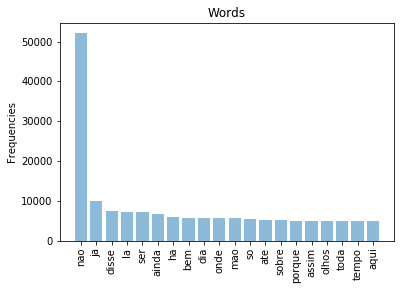

In [46]:
plot_frequencies(top_df)

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [48]:
# get feature names
feature_names = cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc = cleaned_corpora[10]
 
#generate tf-idf for the given document
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))

In [49]:
tf_idf_vector.toarray()

array([[0.      , 0.      , 0.001876, ..., 0.      , 0.      , 0.      ]])

In [50]:
def extract_feature_scores(feature_names, document_vector):
    """
    Function that creates a dictionary with the TF-IDF score for each feature.
    :param feature_names: list with all the feature words.
    :param document_vector: vector containing the extracted features for a specific document
    
    :return: returns a sorted dictionary "feature":"score".
    """
    feature2score = {}
    for i in range(len(feature_names)):
        feature2score[feature_names[i]] = document_vector[0][i]    
    return sorted(feature2score.items(), key=lambda kv: kv[1], reverse=True)

In [51]:
extract_feature_scores(feature_names, tf_idf_vector.toarray())[:10]

[('venceslau', 0.6069201384643949),
 ('julia', 0.40976503689400834),
 ('eduardo', 0.29025123699140865),
 ('elle', 0.19082193013927964),
 ('taveira', 0.18105505057347132),
 ('commendador', 0.1696980948404514),
 ('anna', 0.15197905648445792),
 ('venceslau taveira', 0.14802930206448653),
 ('snr', 0.14632827569568585),
 ('vaz', 0.1359735524644437)]

In [52]:
doc = cleaned_corpora[10]

In [53]:
tf_idf_vector = tfidf_vectorizer.transform(cv.transform([doc]))
tf_idf_vector

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 4206 stored elements in Compressed Sparse Row format>

In [54]:
corpora

,Text,Author,Clean Text,count_punct,word_count_text,word_count_clean
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title scena odio author jose almada negreiros ...,0,1456,1139
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title jardim pierrette author jose almada negr...,0,280,203
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title invencao dia claro author jose almada ne...,0,6212,3439
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title litoral amadeo souza cardozo author jose...,0,1225,476
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao amadeo souza cardoso liga naval lisb...,0,521,354
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,jose almada negreiros k quadrado azul acaba ap...,0,5876,3912
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,orpheu revista trimestral literatura portugal ...,0,14191,9526
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,engomadeira novela vulgar lisboeta engomadeira...,0,11408,7217
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,manifesto anti dantas extenso jose almada negr...,0,2441,1621
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,vinho porto processo d bestialidade ingleza ex...,0,10154,5925


In [55]:
corpora['Word List'] = corpora['Clean Text']

for i in corpora.index:
    mystr = corpora['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora['Word List'][i] = wordList
    
corpora

C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Text,Author,Clean Text,count_punct,word_count_text,word_count_clean,Word List
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title scena odio author jose almada negreiros ...,0,1456,1139,"[title, scena, odio, author, jose, almada, neg..."
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title jardim pierrette author jose almada negr...,0,280,203,"[title, jardim, pierrette, author, jose, almad..."
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title invencao dia claro author jose almada ne...,0,6212,3439,"[title, invencao, dia, claro, author, jose, al..."
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title litoral amadeo souza cardozo author jose...,0,1225,476,"[title, litoral, amadeo, souza, cardozo, autho..."
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao amadeo souza cardoso liga naval lisb...,0,521,354,"[exposicao, amadeo, souza, cardoso, liga, nava..."
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,jose almada negreiros k quadrado azul acaba ap...,0,5876,3912,"[jose, almada, negreiros, k, quadrado, azul, a..."
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,orpheu revista trimestral literatura portugal ...,0,14191,9526,"[orpheu, revista, trimestral, literatura, port..."
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,engomadeira novela vulgar lisboeta engomadeira...,0,11408,7217,"[engomadeira, novela, vulgar, lisboeta, engoma..."
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,manifesto anti dantas extenso jose almada negr...,0,2441,1621,"[manifesto, anti, dantas, extenso, jose, almad..."
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,vinho porto processo d bestialidade ingleza ex...,0,10154,5925,"[vinho, porto, processo, d, bestialidade, ingl..."


In [56]:
# rethink this later
def knn(corpora, textList, k):
    #textList = re.sub("[^\w]", " ",  text).split()
    
    similarity = pd.Series(index = corpora.index) #similarity score
    
    #for every text excerpt in the corpora
    for i in corpora.index:
        sim = 0
        #if the word in the corpora text is also in the text we want to classify then the corpora text gets a point
        for word in textList:
            if word in corpora['Word List'][i]:
                sim += 1
            
        similarity[i] = sim
        
    #get top k scores
    similarity.sort_values(ascending=False, inplace=True)
    
    similarity = similarity[:k]
    
    classification = []
    
    #get the authors of the most similar texts
    for i in similarity.index:
        author = corpora['Author'][i]
        classification.append(author)
        
    knn = pd.DataFrame({'Similarity':similarity.values,'Author':classification})
    knn.set_index(similarity.index, inplace=True)
    
    #get the most frequent author in the top k
    a = knn['Author'].mode()
        
    #if there's two or more authors with the biggest frequency get the one with the highest similarity score
    if a.shape[0]>1:
        a = knn.loc[knn['Author'].isin(a.values)].reset_index().loc[0,['Author']]
        
    return a

In [57]:
c = corpora[1:]
text = corpora['Word List'][0]
knn(c, text, 10)

Author    Eca de Queiros
Name: 0, dtype: object

In [58]:
Encoder = LabelEncoder()

Y = pd.Series(Encoder.fit_transform(corpora['Author']))

train_X = corpora['Clean Text'].drop(index=[30,31])
train_Y = Y.drop(index=[30,31])

test_X = corpora['Clean Text'][30:32]
test_Y = Y[30:32]

In [59]:
train_Y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    2
     ..
33    2
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    4
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    5
55    5
56    5
57    5
58    5
59    5
60    5
61    5
62    5
Length: 61, dtype: int32

In [60]:
test_Y

30    2
31    2
dtype: int32

In [61]:
Tfidf_vect = TfidfVectorizer(
    max_df=0.8,
    stop_words=stop_words, 
    max_features=10000, 
    ngram_range=(1,3)
)
Tfidf_vect.fit(corpora['Clean Text'])

train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)
print(Tfidf_vect.vocabulary_)

{'scena': 8455, 'odio': 6495, 'author': 962, 'almada': 429, 'portuguese': 7296, 'alvaro': 454, 'campos': 1451, 'poema': 7205, 'escripto': 3617, 'noites': 6381, 'durou': 3244, 'revolucao': 8172, 'maio': 5707, 'vara': 9629, 'castigo': 1595, 'riso': 8204, 'dentes': 2677, 'inferno': 4977, 'arder': 764, 'cantar': 1474, 'vermelho': 9736, 'demonio': 2665, 'gula': 4643, 'genio': 4502, 'mare': 5815, 'alta': 439, 'raiva': 7797, 'vive': 9895, 'deram': 2693, 'poeta': 7209, 'canta': 1472, 'gala': 4441, 'sonora': 8871, 'gloria': 4533, 'commum': 1995, 'querem': 7725, 'rir': 8198, 'trovao': 9507, 'lev': 5473, 'almas': 430, 'jardim': 5206, 'sodoma': 8812, 'nero': 6324, 'virgem': 9852, 'milagre': 6018, 'galope': 4449, 'doido': 3147, 'abandono': 15, 'ira': 5146, 'avo': 1001, 'gemidos': 4495, 'fracos': 4325, 'ruidos': 8288, 'distantes': 3065, 'maldicao': 5717, 'eterna': 3834, 'antiga': 597, 'ruinas': 8292, 'innocentes': 5016, 'azas': 1006, 'martyres': 5850, 'vicio': 9775, 'virtude': 9861, 'sanctum': 8412,

In [62]:
print(train_X_Tfidf)

  (0, 9996)	0.04372762371881927
  (0, 9977)	0.042616708529948484
  (0, 9972)	0.028867742249591412
  (0, 9955)	0.032829920126941164
  (0, 9954)	0.028867742249591412
  (0, 9946)	0.026937064685846075
  (0, 9935)	0.028867742249591412
  (0, 9907)	0.07557166315938789
  (0, 9895)	0.04875199714360933
  (0, 9893)	0.07078834621293213
  (0, 9861)	0.05673134012110431
  (0, 9852)	0.06321566959590852
  (0, 9851)	0.03413936909487212
  (0, 9825)	0.025611825550148737
  (0, 9790)	0.03413936909487212
  (0, 9789)	0.03160783479795426
  (0, 9781)	0.04057855565190033
  (0, 9775)	0.03629768298420534
  (0, 9736)	0.08509701018165647
  (0, 9724)	0.027876988072005702
  (0, 9723)	0.02477875079651285
  (0, 9720)	0.025611825550148737
  (0, 9629)	0.06827873818974424
  (0, 9581)	0.07927726453148141
  (0, 9535)	0.03963863226574071
  :	:
  (60, 255)	0.009954787473213213
  (60, 254)	0.007393480648357478
  (60, 253)	0.006702112661520717
  (60, 242)	0.004796076594944875
  (60, 175)	0.008660911363113304
  (60, 171)	0.006269

In [63]:
# fit the training dataset on the NB classifier
Naive = MultinomialNB()
Naive.fit(train_X_Tfidf,train_Y)# predict the labels on validation dataset
predictions_NB = Naive.predict(test_X_Tfidf)# Use accuracy_score function to get the accuracy
print(predictions_NB)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_Y)*100)

[1 1]
Naive Bayes Accuracy Score ->  0.0


In [64]:
count_vect = CountVectorizer(
    max_df=0.8,
    stop_words=stop_words, 
    max_features=10000, 
    ngram_range=(1,3)
)
count_vect.fit(corpora['Clean Text'])

train_X_cv = count_vect.transform(train_X)
test_X_cv = count_vect.transform(test_X)
print(count_vect.vocabulary_)

{'scena': 8455, 'odio': 6495, 'author': 962, 'almada': 429, 'portuguese': 7296, 'alvaro': 454, 'campos': 1451, 'poema': 7205, 'escripto': 3617, 'noites': 6381, 'durou': 3244, 'revolucao': 8172, 'maio': 5707, 'vara': 9629, 'castigo': 1595, 'riso': 8204, 'dentes': 2677, 'inferno': 4977, 'arder': 764, 'cantar': 1474, 'vermelho': 9736, 'demonio': 2665, 'gula': 4643, 'genio': 4502, 'mare': 5815, 'alta': 439, 'raiva': 7797, 'vive': 9895, 'deram': 2693, 'poeta': 7209, 'canta': 1472, 'gala': 4441, 'sonora': 8871, 'gloria': 4533, 'commum': 1995, 'querem': 7725, 'rir': 8198, 'trovao': 9507, 'lev': 5473, 'almas': 430, 'jardim': 5206, 'sodoma': 8812, 'nero': 6324, 'virgem': 9852, 'milagre': 6018, 'galope': 4449, 'doido': 3147, 'abandono': 15, 'ira': 5146, 'avo': 1001, 'gemidos': 4495, 'fracos': 4325, 'ruidos': 8288, 'distantes': 3065, 'maldicao': 5717, 'eterna': 3834, 'antiga': 597, 'ruinas': 8292, 'innocentes': 5016, 'azas': 1006, 'martyres': 5850, 'vicio': 9775, 'virtude': 9861, 'sanctum': 8412,

In [65]:
Naive.fit(train_X_cv,train_Y)# predict the labels on validation dataset
predictions_NB = Naive.predict(test_X_cv)# Use accuracy_score function to get the accuracy
print(predictions_NB)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_Y)*100)

[2 2]
Naive Bayes Accuracy Score ->  100.0


In [66]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = SVC(degree=5)
SVM.fit(train_X_Tfidf,train_Y)# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_X_Tfidf)# Use accuracy_score function to get the accuracy
print(predictions_SVM)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_Y)*100)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[1 1]
SVM Accuracy Score ->  0.0


In [67]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = SVC(degree=5)
SVM.fit(train_X_cv,train_Y)# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_X_cv)# Use accuracy_score function to get the accuracy
print(predictions_SVM)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_Y)*100)

[1 1]
SVM Accuracy Score ->  0.0


In [68]:
parameters = {
    'C':[1,2,3,4,5],
    #'kernel':['linear','poly','rbf','sigmoid','precomputed'],
    'degree':[1,2,3,4,5],
    'gamma':['scale','auto'],
    'shrinking':[True,False],
    'probability':[True,False],
    'decision_function_shape':['ovo','ovr'],
}

clf = GridSearchCV(SVM, parameters)
clf.fit(train_X_Tfidf,train_Y)
clf.best_params_

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 2,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'probability': True,
 'shrinking': True}

In [69]:
clf.fit(train_X_cv,train_Y)
clf.best_params_

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 5,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'probability': True,
 'shrinking': True}

In [70]:
SVM = SVC(C=2,decision_function_shape='ovo',degree=1,gamma='scale',probability=True,shrinking=True)
SVM.fit(train_X_Tfidf,train_Y)# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_X_Tfidf)# Use accuracy_score function to get the accuracy
print(predictions_SVM)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_Y)*100)

[1 1]
SVM Accuracy Score ->  0.0


In [71]:
SVM = SVC(C=5,decision_function_shape='ovo',degree=1,gamma='scale',probability=True,shrinking=True)
SVM.fit(train_X_cv,train_Y)# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_X_cv)# Use accuracy_score function to get the accuracy
print(predictions_SVM)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_Y)*100)

[0 1]
SVM Accuracy Score ->  0.0


In [72]:
parameters = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
}

dt = DecisionTreeClassifier()

clf = GridSearchCV(dt, parameters)
clf.fit(train_X_Tfidf,train_Y)
clf.best_params_

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini', 'splitter': 'best'}

In [73]:
clf.fit(train_X_cv,train_Y)
clf.best_params_

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'gini', 'splitter': 'random'}

In [74]:
dt = DecisionTreeClassifier(criterion='entropy',splitter='random')
dt.fit(train_X_Tfidf,train_Y)
predictions_dt = dt.predict(test_X_Tfidf)
print(predictions_dt)
print("DT Accuracy Score -> ",accuracy_score(predictions_dt, test_Y)*100)

[5 4]
DT Accuracy Score ->  0.0


In [75]:
dt = DecisionTreeClassifier(criterion='gini',splitter='random')
dt.fit(train_X_cv,train_Y)
predictions_dt = dt.predict(test_X_cv)
print(predictions_dt)
print("DT Accuracy Score -> ",accuracy_score(predictions_dt, test_Y)*100)

[2 2]
DT Accuracy Score ->  100.0


In [76]:
train_X = corpora['Word List'].drop(index=[30,31])
train_Y = Y.drop(index=[30,31])

test_X = corpora['Word List'][30:32]
test_Y = Y[30:32]

model_train = gensim.models.Word2Vec(train_X,min_count=0,workers=4)
model_test = gensim.models.Word2Vec(test_X,min_count=0,workers=4)

In [77]:
text_scores = []

for i in tqdm(train_X.index):
    text = train_X[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = model_train[word]
            
        else:
            text_vect = np.add(text_vect,model_train[word])
        
    score = list(np.asarray(text_vect) / n)
    
    text_scores.append(score)
    
#txt_scores = pd.Series(text_scores,index=train_X.index)

C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [78]:
text_scores_test = []

for i in tqdm(test_X.index):
    text = test_X[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = model_test[word]
            
        else:
            text_vect = np.add(text_vect,model_test[word])
        
    score = list(np.asarray(text_vect) / n)
    
    text_scores_test.append(score)
    
#txt_scores_test = pd.Series(text_scores,index=test_X.index)

C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [79]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(alpha = 0.7, max_iter=400) 
classifier.fit(text_scores, train_Y)
predictions_MLP = classifier.predict(text_scores_test)# Use accuracy_score function to get the accuracy
print(predictions_MLP)
print("MLP Accuracy Score -> ",accuracy_score(predictions_MLP, test_Y)*100)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[3 3]
MLP Accuracy Score ->  0.0
